# Machine Learning For Everyone
Lecture notes for HuStar Project by idebtor@gmail.com 
**************

# 제 5 강: 선형 회귀 1 $^{Linear Regression}$ 


## 학습 목표
    - 선형 회귀를 활용하여 기계 학습의 Workflow를 이해한다. 
    
## 학습 내용
    - 선형 회귀
    - Training set vs Test set


__Simple Linear Regression__ is a statistical method to find relationship between two continuous variables. Out of the two variables present, one is independent variable and the other is dependent variable. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

This relationship is defined by the famous line equation which you would have learned in high school.

$y = b + w_1x_1$
where,
- $y$ is the dependent variable,
- $b$ is a bias or the base value of the relationship,
- $x_1$ is the independent variable,
- $w_1$ is the slope of the line explaining the relationship between $y$ & $x_1$.

For instance, $y$ refers to how does a student's score change with the hours of study that he has done. So in that case scores would be the dependent variable and study hours will be the independent variable and the base value will the score of a person who has no study hours. In our code example, we are going to work on such a dataset.

In order to determine what is the best fitting line, let's have a look at the following figure.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/linear_regression3.png?raw=true" width="400">
<center>그림 1: 선형 회귀 모델</center>

The blue dots are actual or real data points, whereas a line is a predicted best fit values of the regression model. The goal here is to make such a regression model that the sum of squared error between dots and the line is minimum.

Before diving into Regression part of the model, we need to perform Data Preprocessing on our dataset. I am going to write the code for that directly.


## Importing the dataset and performing Data Preprocessing

Diving into the dataset of our code today. We have a business problem, where a student body wants to establish a relationship between the study hours and the scores they get. We are going to investigate that correlation using Simple Linear Regression.

Simple Linear Regression will tell us what is the best fitting line for this relationship. Let’s have a look at the dataset. You can download the dataset here.

Our data consists of total 30 students and two attributes, __Hours studied__ and __Scores earned__. The attribute __Hours__ $x_1$ is the independent attribute and the attribute __Scores__ $y$ is the dependent attribute.


Before diving into Regression part of the model, we need to perform Data Preprocessing on our dataset. Let us write the code that reads the data(`hours-scores.csv`) in a file. You may view the file itself using the cell magic command.

### 1. Collecting and examining dataset

In [7]:
!cat data/hours-scores.csv

hour,score
1.1,39.0
1.3,46.0
1.5,37.0
2.0,37.0
2.2,40.0
3.0,60.0
3.2,54.0
3.7,57.0
3.9,64.0
4.0,55.0
4.0,60.0
4.1,57.0
4.2,58.0
4.5,61.0
5.0,70.0
5.1,70.0
5.1,66.0
5.2,72.0
5.3,83.0
5.4,82.0
5.5,85.0
5.9,83.0
6.0,93.0
6.5,95.0
6.8,91.0
7.0,98.0


In [12]:
!cat 

/c/GitHub/HuStar-ML/book


After executing this code, we have our training and testing sets split along with arrays and vectors of independent and dependent attributes respectively. They should look like this:

### 2. Reading and split dataset

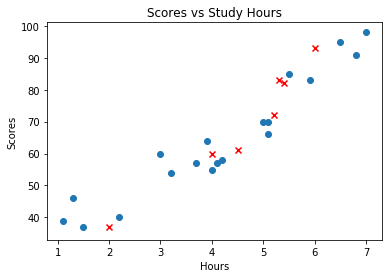

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('data/hours-scores.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 1)

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color = 'red', marker = 'x')
#plt.plot(X_train, regressor.predict(X_train))
plt.title('Scores vs Study Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [21]:
print(X.shape)
print(y.shape)

(26, 1)
(26,)


### 3. Setting and training the model

Now let us set our a simple linear regession model which is available from sklearn library and apply it for the training set. 

In [23]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()     # use LinearRegression()
regressor.fit(X_train, y_train)    # use fit() and X_train, y_train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4. Predicting the test dataset

Since, our Machine Learning model already knows the correlation of our training set, we will now predict the values of our testing set and then later compare them with the actual values of the test set.
To predict the values of the test set, we need to write the following code:

In [25]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)      # Use X_test to see how good the model is

After execution of code until now, we can manually have a look at the __predicted test set values__ and __actual test set values__ and see the how do they differ.

As you can see, the values differ with each other. Some have a very low difference like the $10^{th}$ entry and some have a slightly higher difference like the $11^{th}$ entry.


### 5. Visualising the correlation in the dataset

Inorder to judge the actual correlation amongst the data, we are going to plot two curves.
- Visualising the Training set results
We do this using the following code:

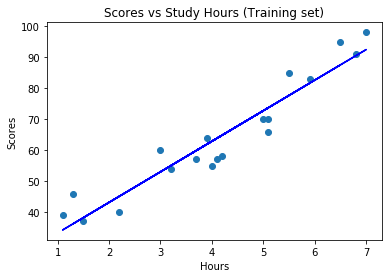

In [26]:
# Visualising the Training set results

plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Scores vs Study Hours (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

As it can be seen, the line we have here is not that bad, since only a few points lie very far from it, most of the points lie around the line itself.

- Visualising the Test set results

We do this using the following code:


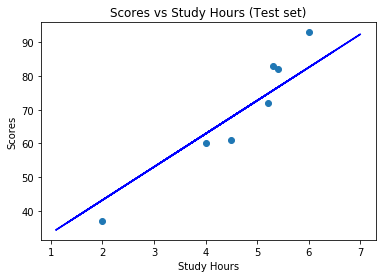

In [27]:
# Visualising the Test set results

plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Scores vs Study Hours (Test set)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

Here, there can be a confusion on why the parameter of `regressor.predict()` is not changed in `plt.plot(X_train, regressor.predict(X_train), color = 'blue')` to `X_test`. This is so because, if we do that, we will get a new line altogether but we want to compare our test set to the line we got from our training set. 
The curve will look like this:


Here, it can be seen that the line passes in the middle of a test data set as well. This concludes a Simple Linear Regression in Python for Machine Learning Modelling.

-------
_Rejoice always, pray continually, give thanks in all circumstances; for this is God’s will for you in Christ Jesus. (1 Thes 5:16-18)_

------------